### Tasa de formación estelar para toda la galaxia

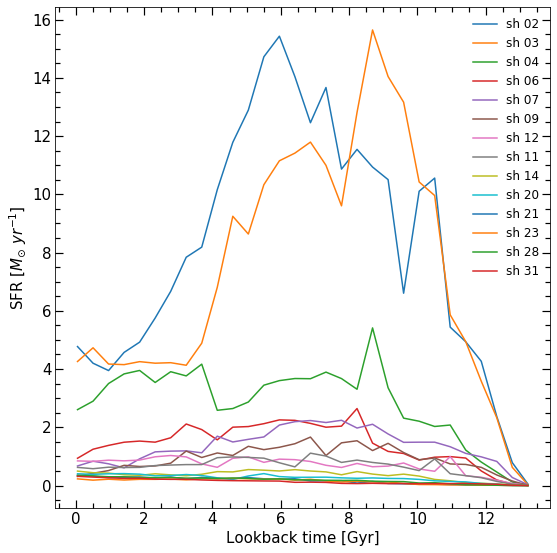

In [4]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import bines2 as bines

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.98,top=0.97)

nbin = 30
time = np.linspace(0.05156775,13.68449532,nbin+1)
SFR = np.zeros(nbin)
    
ID = np.loadtxt('../_data/my_halos.dat')[:,0]
 
path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]
    
    limit = np.where(rstr < rgal)

    mstr = mstr[amask][limit]*1e10/h
    age = age[limit]
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
        
    for i in range(nbin):
        mask,= np.where((time[i] < age) & (age < time[i+1]))
        dt = time[i+1]-time[i]
        Mtot = np.sum(mstr[mask])
        SFR[i]  = Mtot/(dt*1e9)
    
    
    ax.plot(time[:-1],SFR, ls='-', label='sh '+Id)
    
ax.minorticks_on()
# ax.set_yscale('log')
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
# ax.set_xlim(0,14)
ax.set_ylabel('SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=15)
ax.set_xlabel('Lookback time [Gyr]',fontsize=15)
ax.legend(fontsize=12,frameon=False)

fig.savefig('../_imagenes/SFR.png',dpi=100, xxbox_inches='tight')

### Tasa de formacion estelar para un anillo alrededor de r50 +/- 1kpc y altura +/- 5kpc

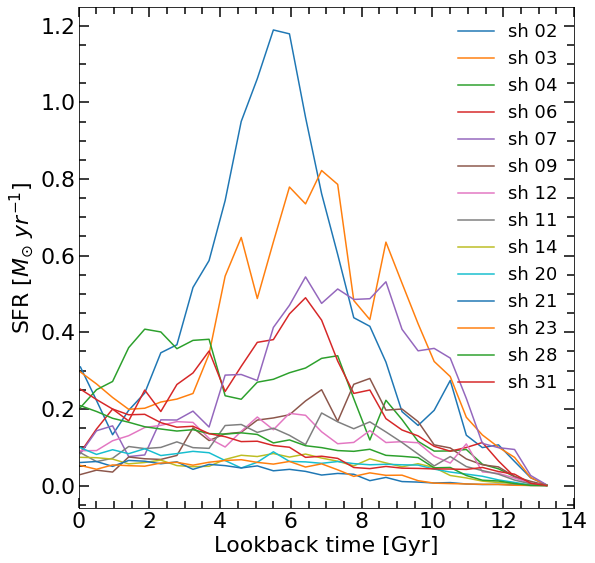

In [12]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import bines2 as bines

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.98,top=0.97)

nbin = 30
time = np.linspace(0.05156775,13.68449532,nbin+1)
SFR = np.zeros(nbin)
    
ID = np.loadtxt('../_data/my_halos.dat')[:,0]
 
path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)
    
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    
    Rn_str = np.sqrt(xn_str**2 + yn_str**2)
    
    gal, = np.where((Rn_str < r50+1) & (Rn_str > r50-1) & 
                    (zn_str < 5) & (zn_str > -5))
    
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
        
    for i in range(nbin):
        mask,= np.where((time[i] < age[gal]) & (age[gal] < time[i+1]))
        dt = time[i+1]-time[i]
        Mtot = np.sum(mstr[gal][mask])
        SFR[i]  = Mtot/(dt*1e9)
    
    
    ax.plot(time[:-1],SFR, ls='-', label='sh '+Id)
    
ax.minorticks_on()
# ax.set_yscale('log')
ax.tick_params( labelsize=22)
ax.tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
ax.set_xlim(0,14)
ax.set_ylabel('SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=22)
ax.set_xlabel('Lookback time [Gyr]',fontsize=22)
ax.legend(fontsize=18,frameon=False)

fig.savefig('../_imagenes/SFR_cut.png',dpi=100, xxbox_inches='tight')

### $\Sigma$SFR para distintos radios

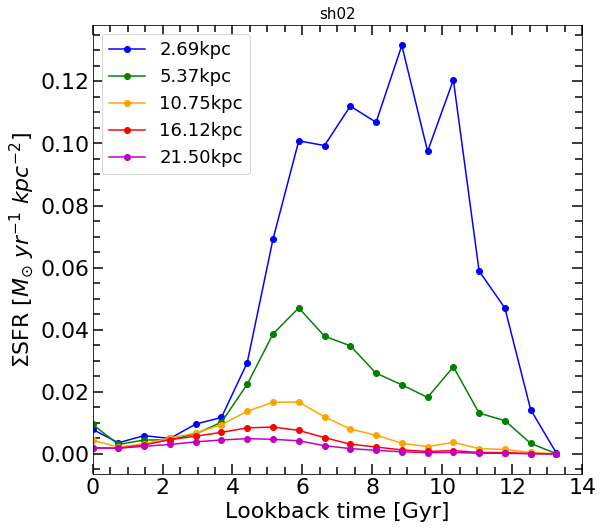

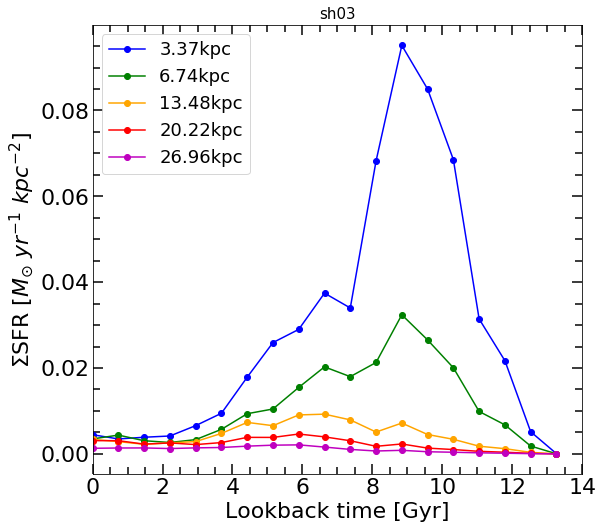

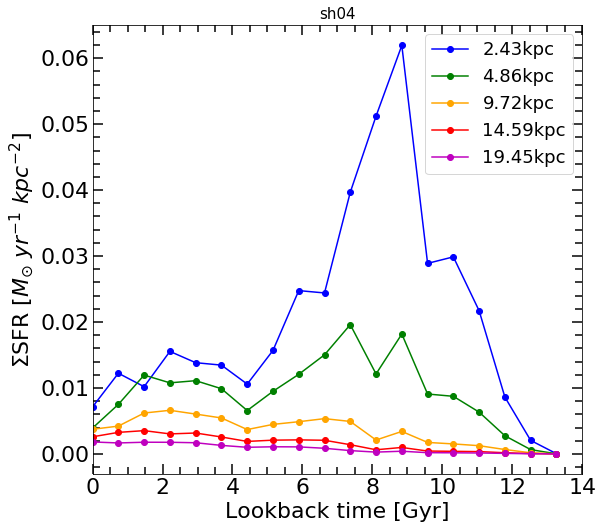

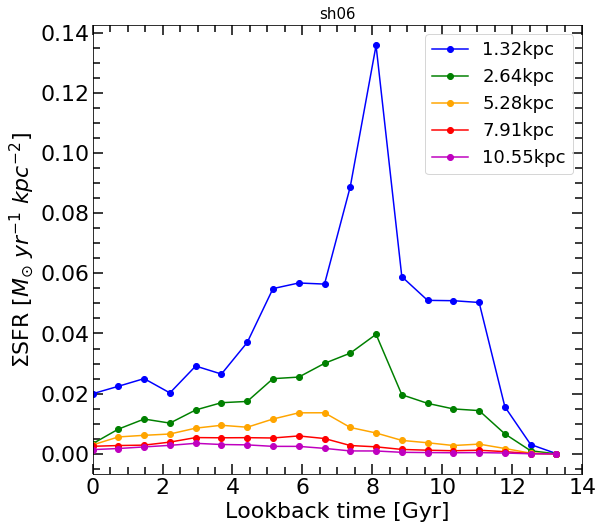

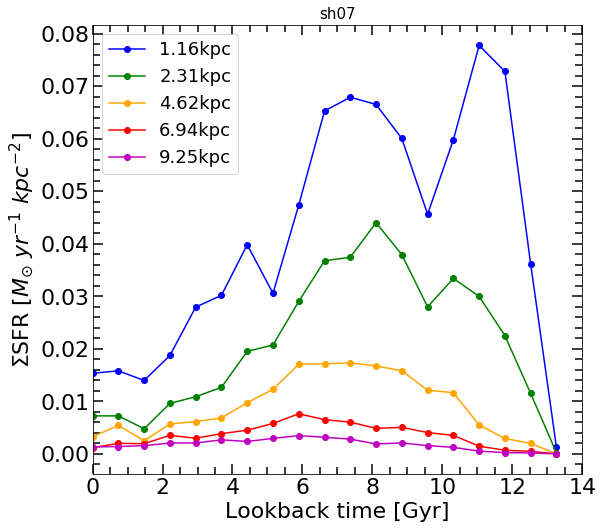

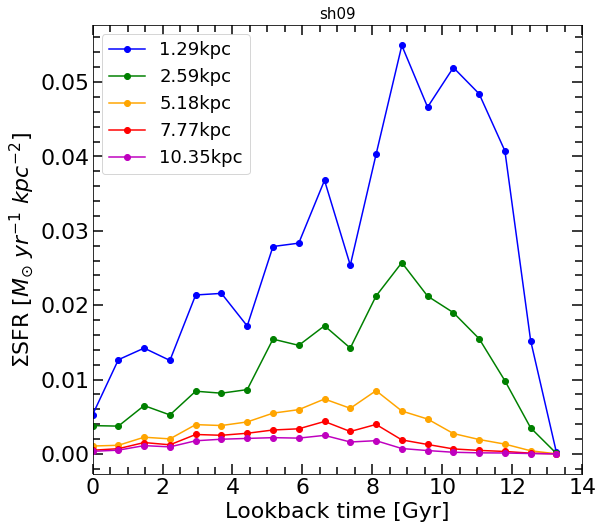

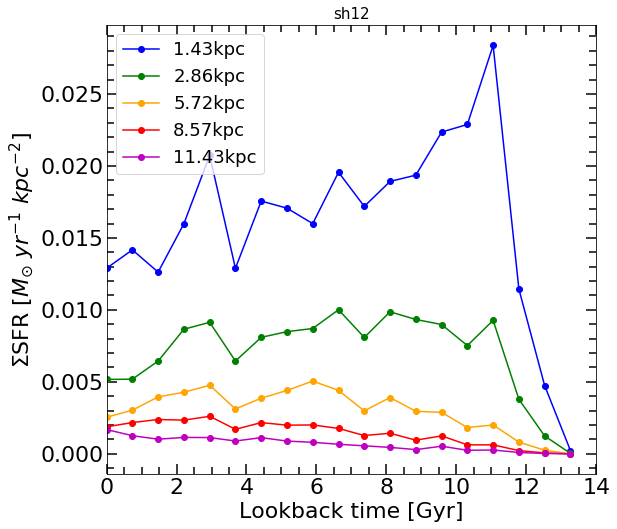

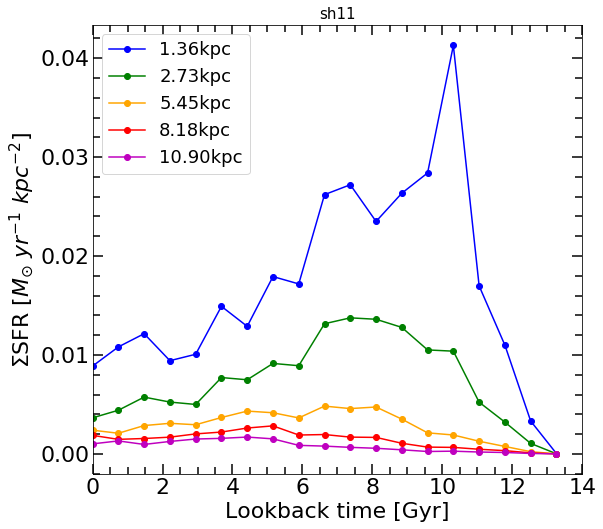

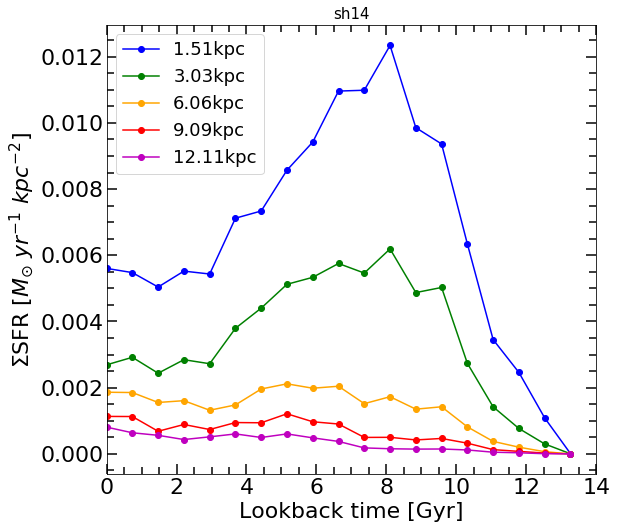

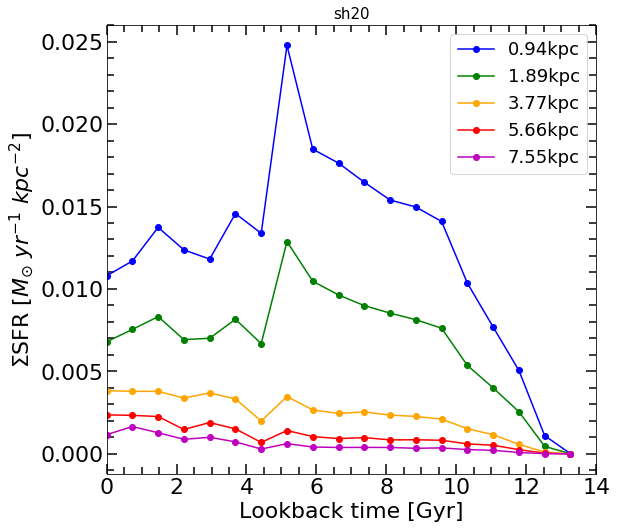

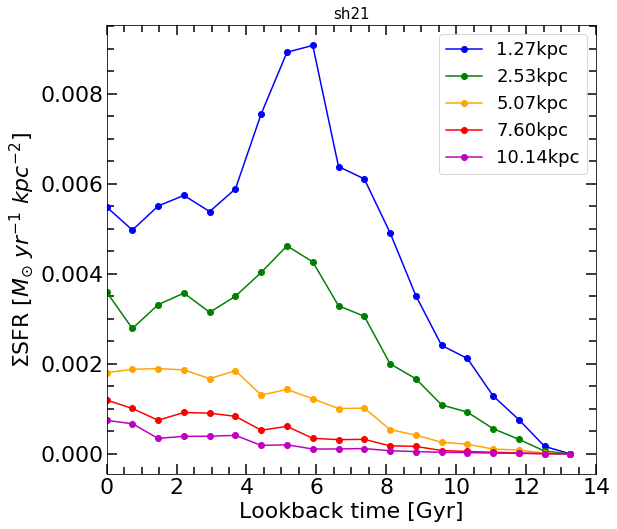

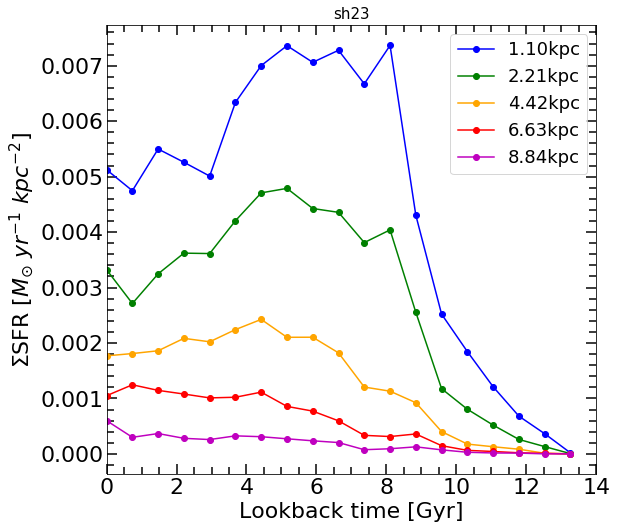

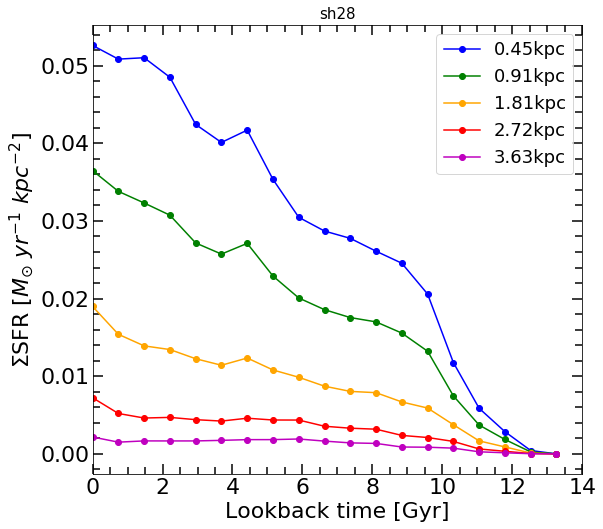

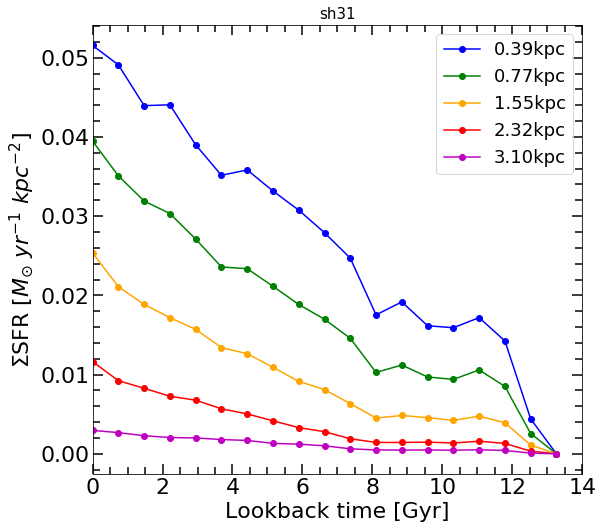

In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import velocity_dispersion as vd

ID = np.loadtxt('../_data/my_halos.dat')[:,0]
 
path = '/store/erebos/omarioni/_simulations/snap_127/'

colors = ('b', 'g', 'orange', 'r', 'm')

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)
    
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    
    Rstr = np.sqrt(xn_str**2 + yn_str**2)
 
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    radius = (r50/4, r50/2, r50, r50+r50/2, r50*2)
    
    age_bin = np.linspace(0,14,20)
    
    for k in range(len(radius)):
        
        gal, = np.where((Rstr < radius[k]+1) & (Rstr > radius[k]-1) & (zn_str < 5) & (zn_str > -5))
        
        SFR = np.ones(len(age_bin))*np.nan
        area = np.pi*2*radius[k] #esto me queda de la dif (R+1)**2-(R-1)**2
    
        for i in range(len(age_bin)-1):
            age_lim, = np.where((age[gal]>age_bin[i]) & (age[gal]<age_bin[i+1]))
            dt = age_bin[i+1]-age_bin[i]
            Mtot = np.sum(mstr[gal][age_lim])
            SFR[i]  = Mtot/(dt*1e9)
            
    
        ax.plot(age_bin,SFR/area,'o-', color=colors[k], label=str('%2.2f'%radius[k])+'kpc')
    
    ax.minorticks_on()
    ax.tick_params( labelsize=22)
    ax.tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax.set_xlim(0,14)
    ax.set_ylabel('$\Sigma$SFR [$M_{\odot}$ $yr^{-1}$ $kpc^{-2}$]',fontsize=22)
    ax.set_xlabel('Lookback time [Gyr]',fontsize=22)
    ax.set_title('sh'+Id,fontsize=15)
    ax.legend(fontsize=18,fancybox=True)

    fig.savefig('../_imagenes/SFR/SFR_sh'+Id+'.png',dpi=100, xxbox_inches='tight')

### $\sigma_z$ vs $\Sigma$SFR para las estrellas a z=0 coloreada por edades

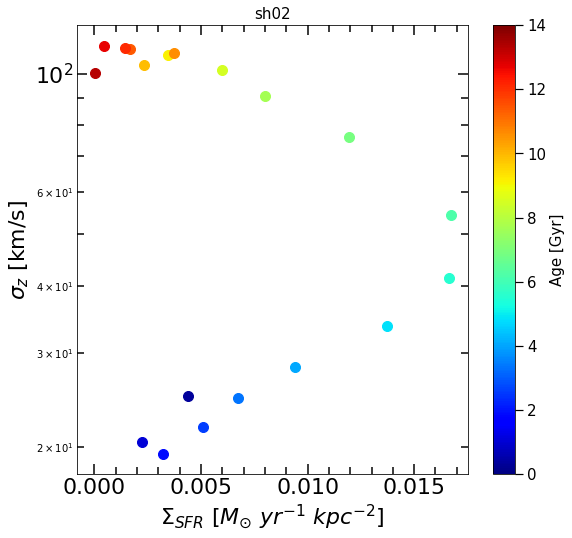

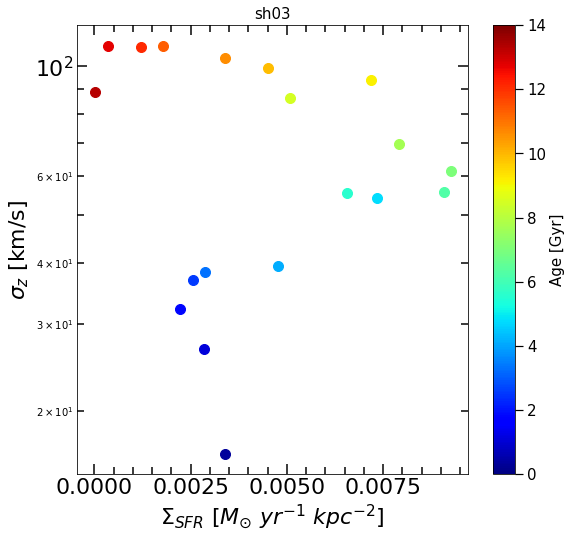

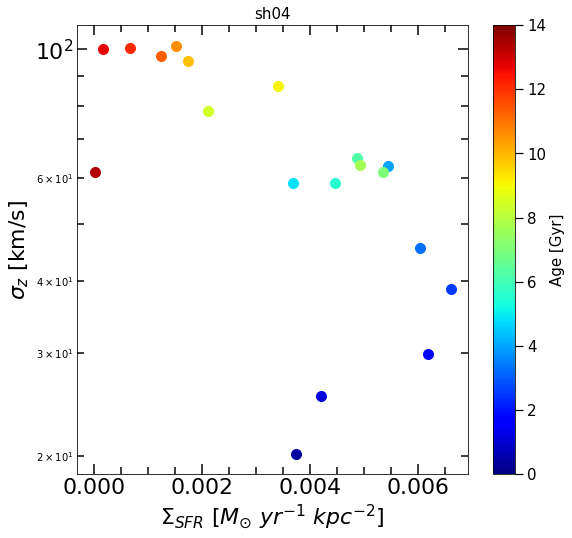

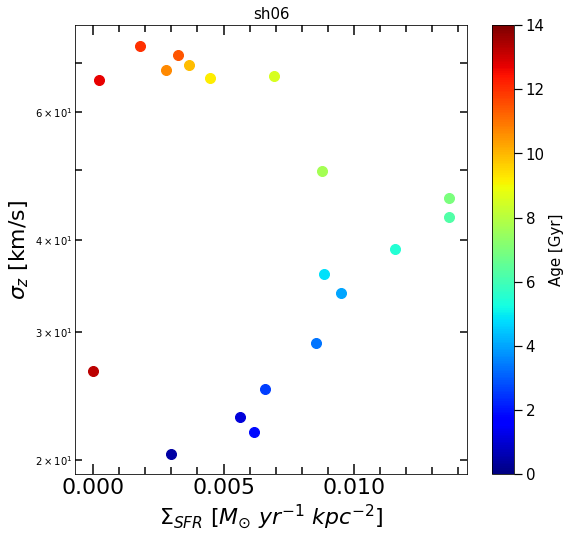

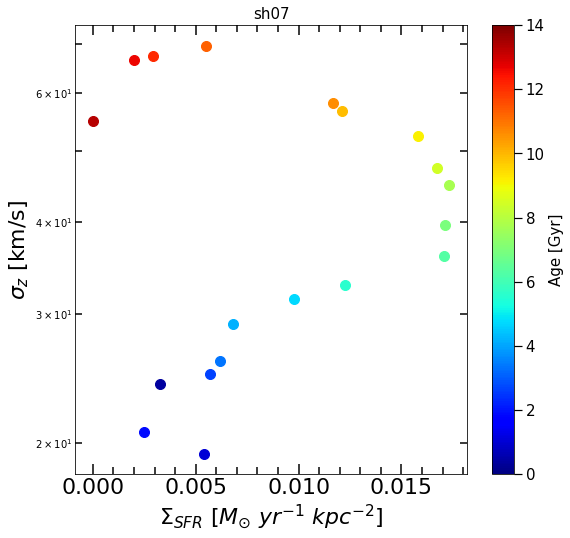

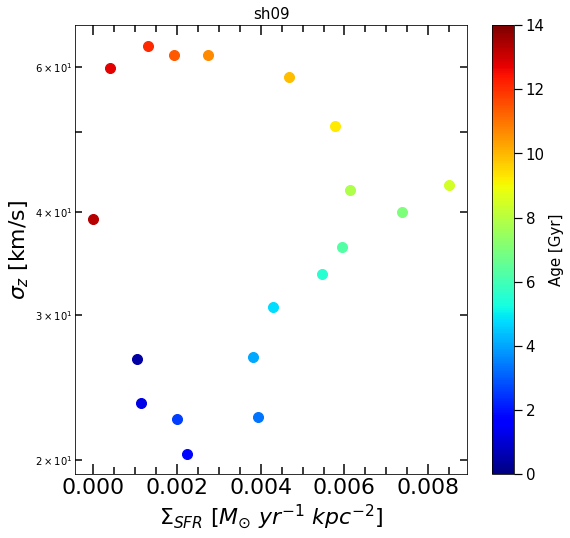

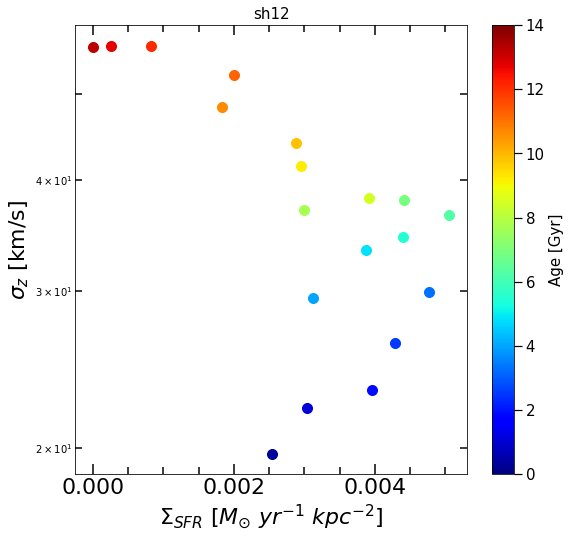

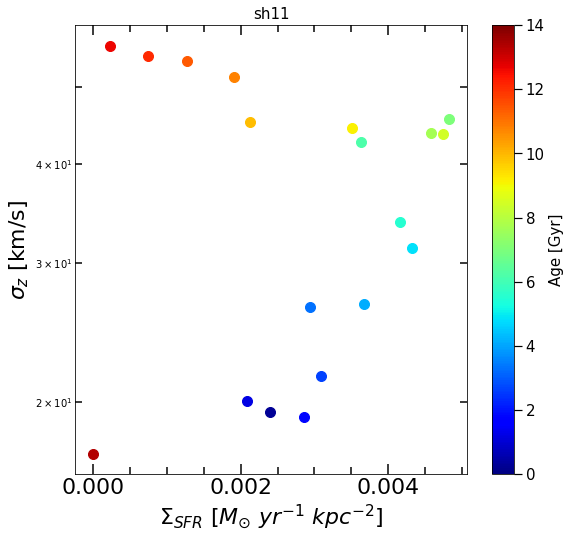

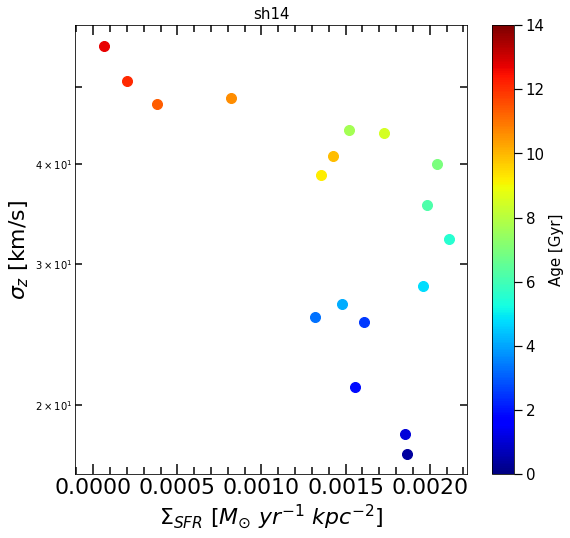

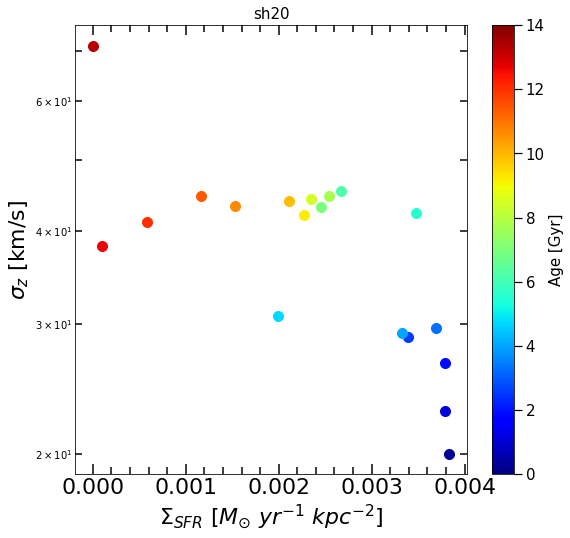

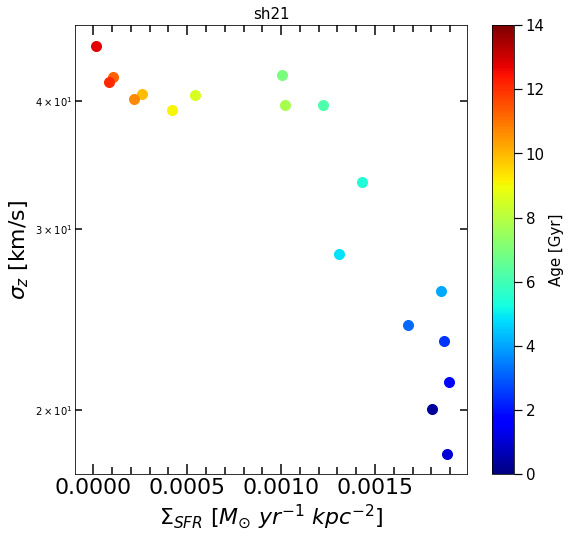

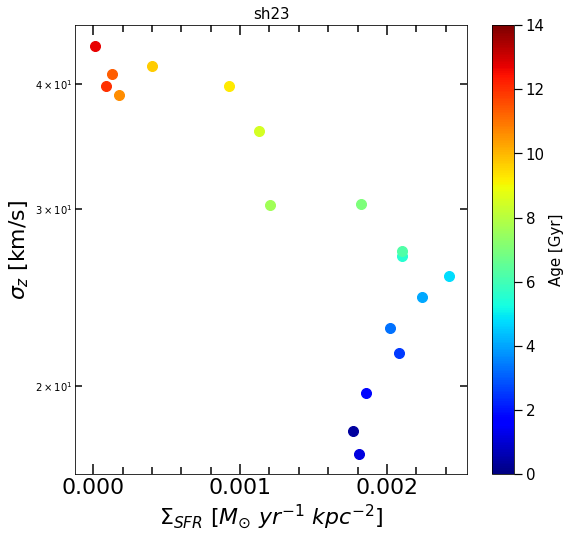

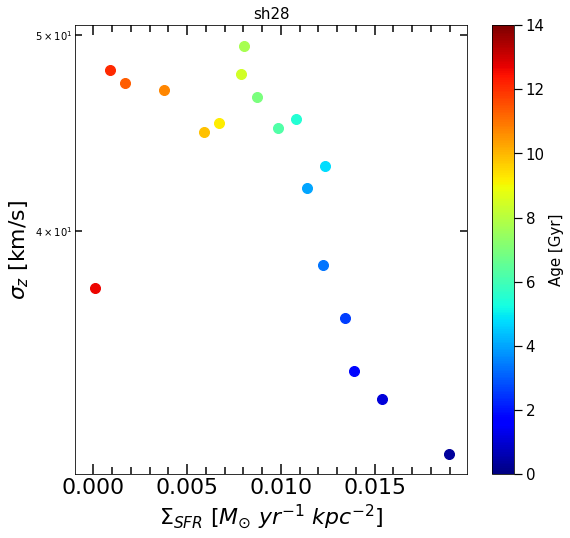

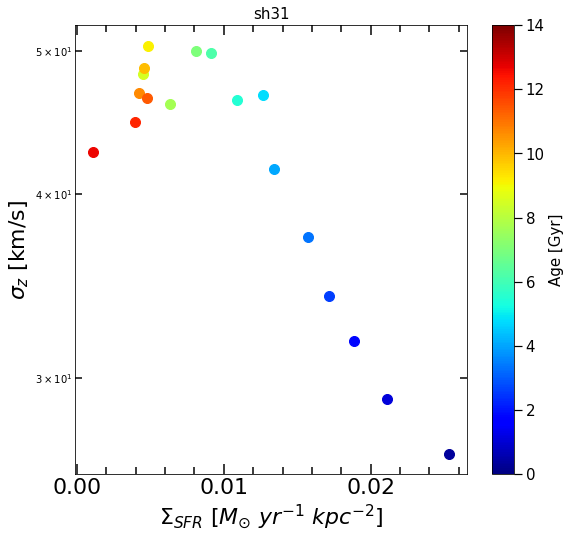

In [10]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import velocity_dispersion as vd
import matplotlib as mpl

ID = np.loadtxt('../_data/my_halos.dat')[:,0]
 
path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)
    
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    Rstr = np.sqrt(xn_str**2 + yn_str**2)
 
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    
    age_bin = np.linspace(0,14,20)
    
    norm = mpl.colors.Normalize(vmin = age_bin.min(),vmax= age_bin.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'jet')

       
    gal, = np.where((Rstr < r50+1) & (Rstr > r50-1) & (zn_str < 5) & (zn_str > -5))

    SFR = np.ones(len(age_bin))*np.nan
    area = np.pi*2*r50 #esto me queda de la dif (R+1)**2-(R-1)**2
    sigma_z = np.ones(len(age_bin))*np.nan
    med_age = np.ones(len(age_bin))*np.nan
    

    for i in range(len(age_bin)-1):
        age_lim, = np.where((age[gal]>age_bin[i]) & (age[gal]<age_bin[i+1]))
        dt = age_bin[i+1]-age_bin[i]
        Mtot = np.sum(mstr[gal][age_lim])
        SFR[i]  = Mtot/(dt*1e9)
        
        med_age[i] = np.median(age[gal][age_lim]) 
        
        sigma_z[i] = vd.vel_disp(vzn[gal][age_lim])


        ax.plot(SFR[i]/area,sigma_z[i],'o',ms=10,color = cmap.to_rgba(med_age[i]))
    
    cbar = fig.colorbar(cmap,ticks=[0,2,4,6,8,10,12,14]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.minorticks_on()
    ax.tick_params( labelsize=22)
    ax.tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax.set_xlabel('$\Sigma_{SFR}$ [$M_{\odot}$ $yr^{-1}$ $kpc^{-2}$]',fontsize=22)
    ax.set_ylabel('$\sigma_z$ [km/s]',fontsize=22)
    ax.set_title('sh'+Id,fontsize=15)

    fig.savefig('../_imagenes/SFR/SFR_sigmaz_sh'+Id+'.png',dpi=100, xxbox_inches='tight')

### $\sigma_z$ vs $\Sigma$SFR para las estrellas a z=0 para distintos radios

Todo esto sigue siendo dentro de anillos

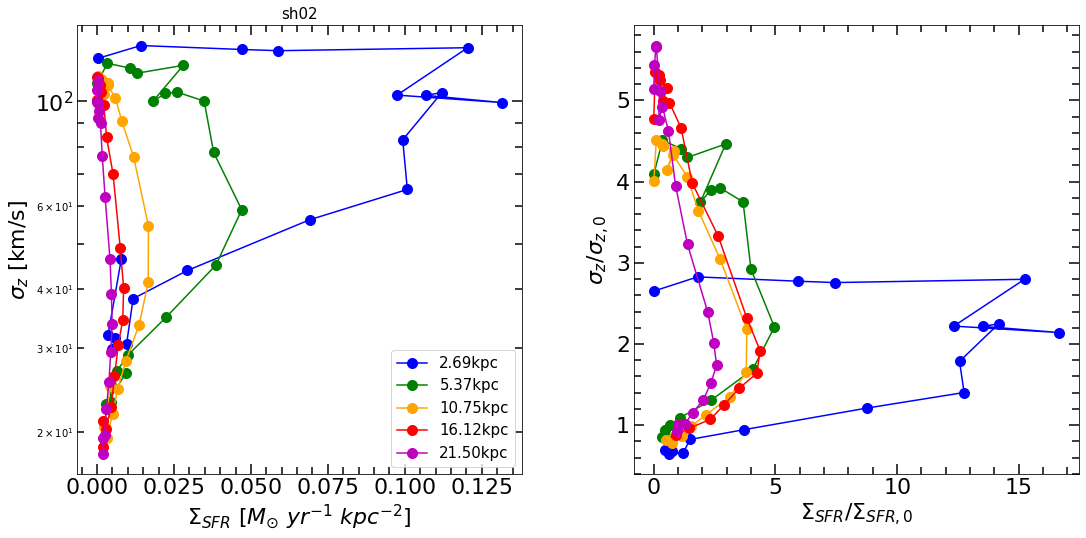

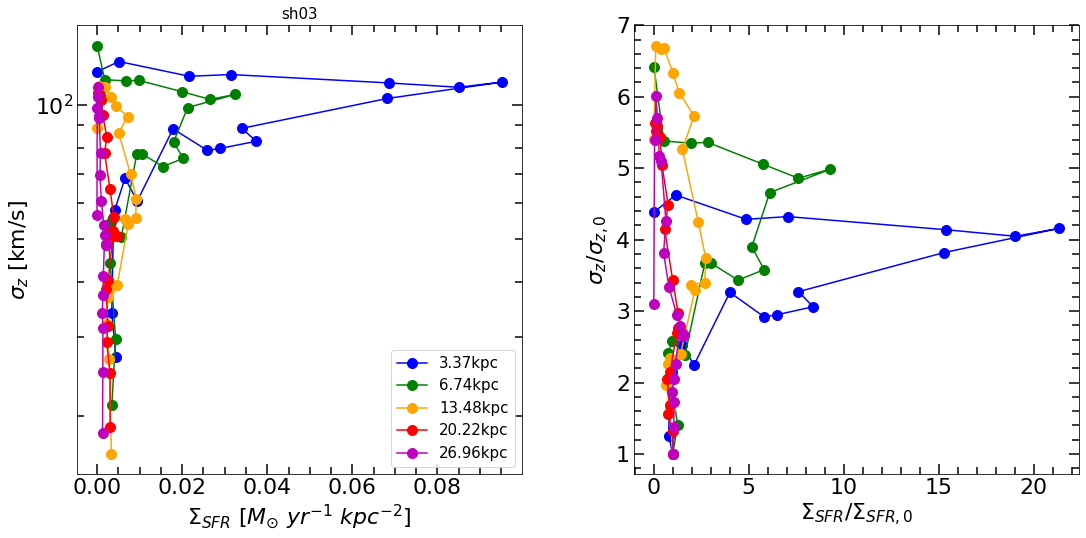

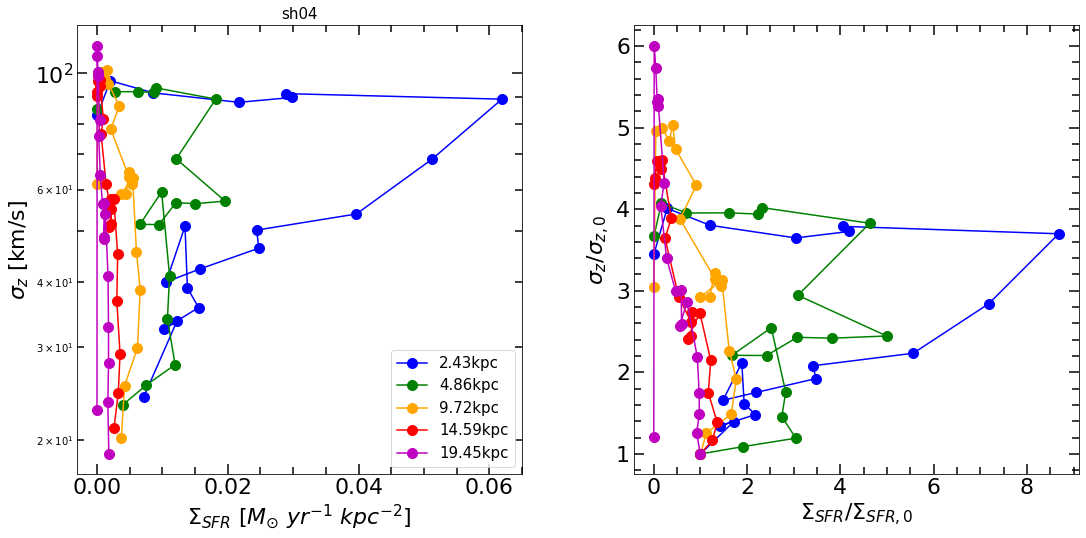

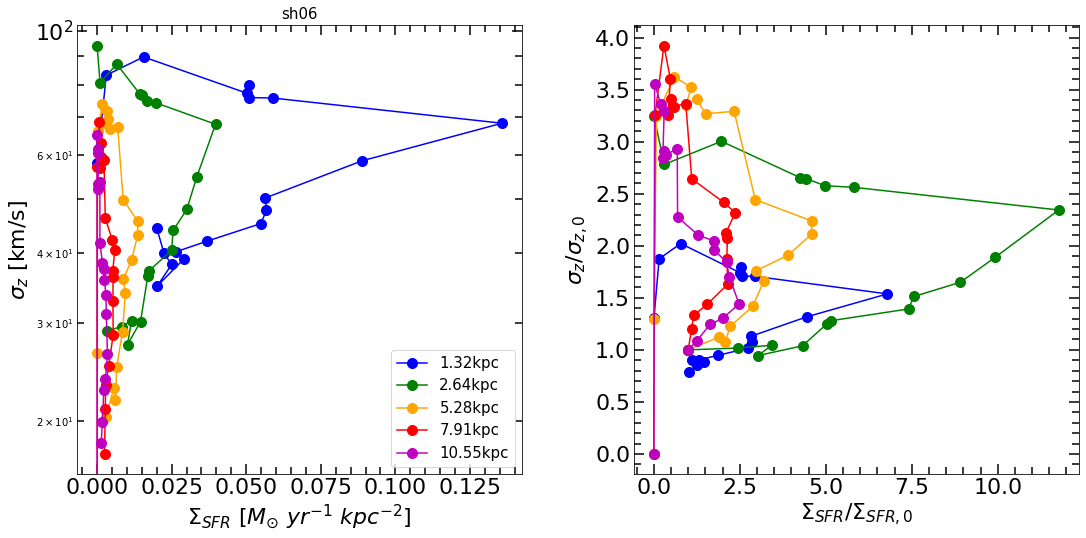

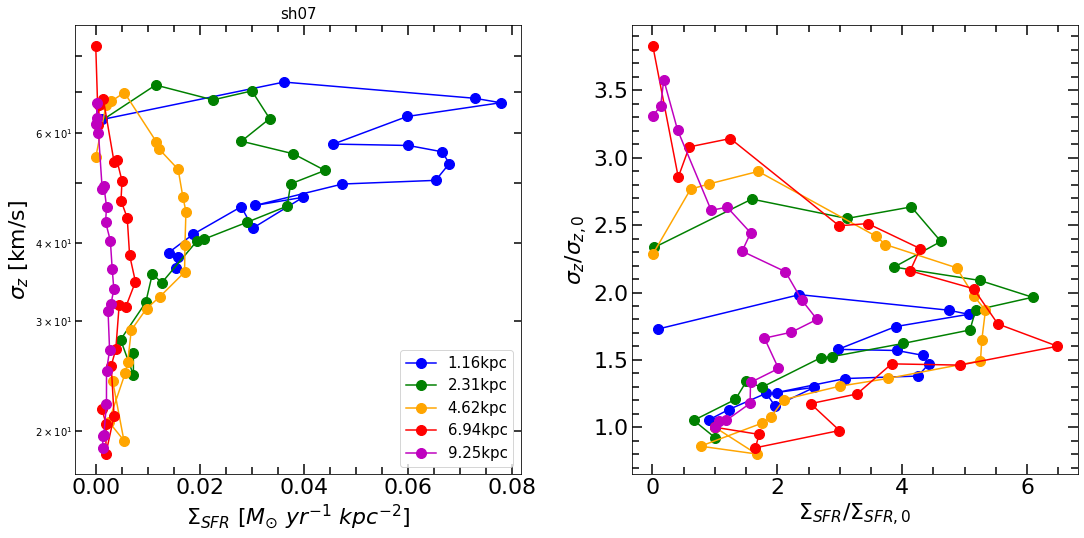

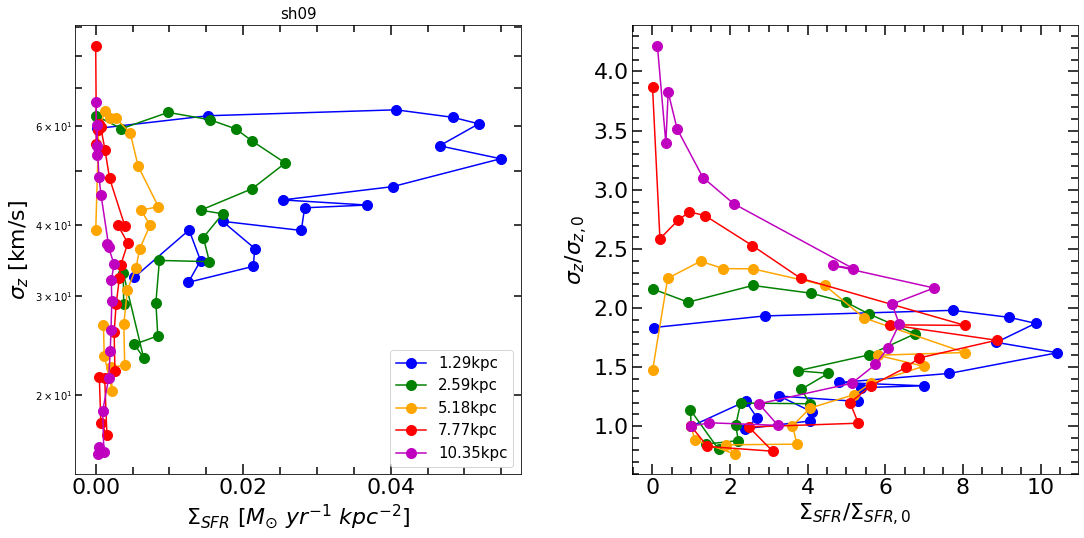

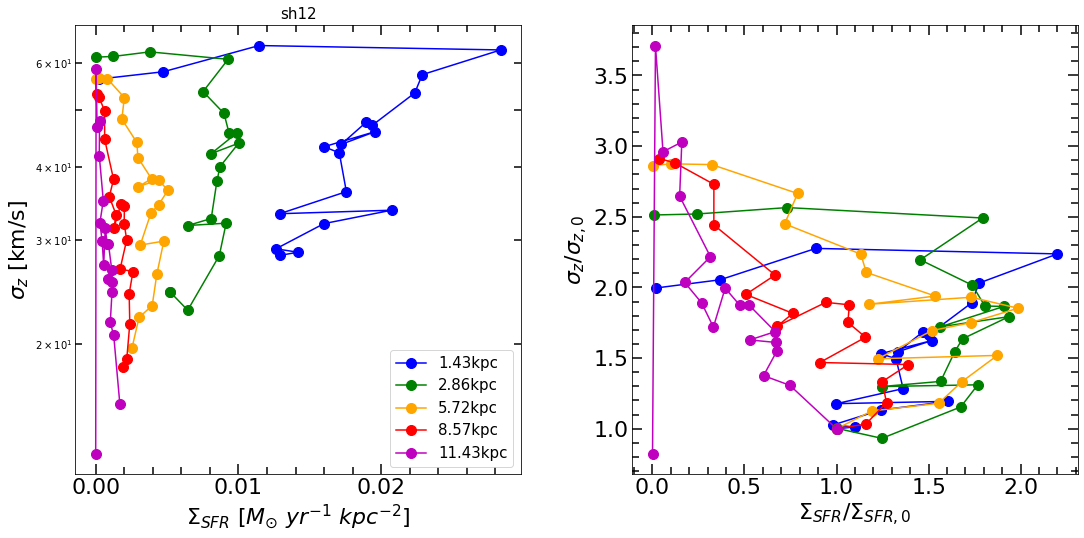

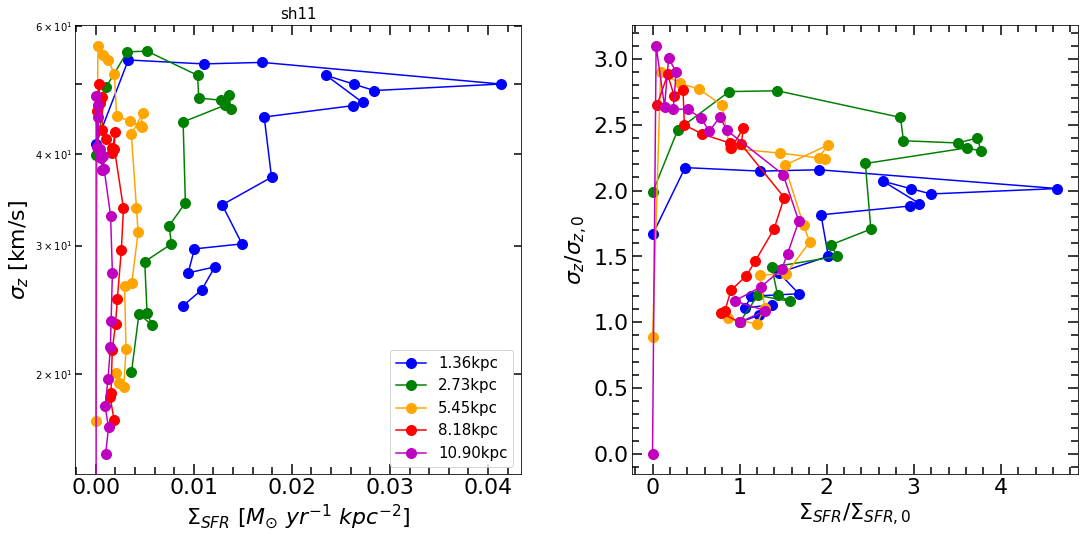

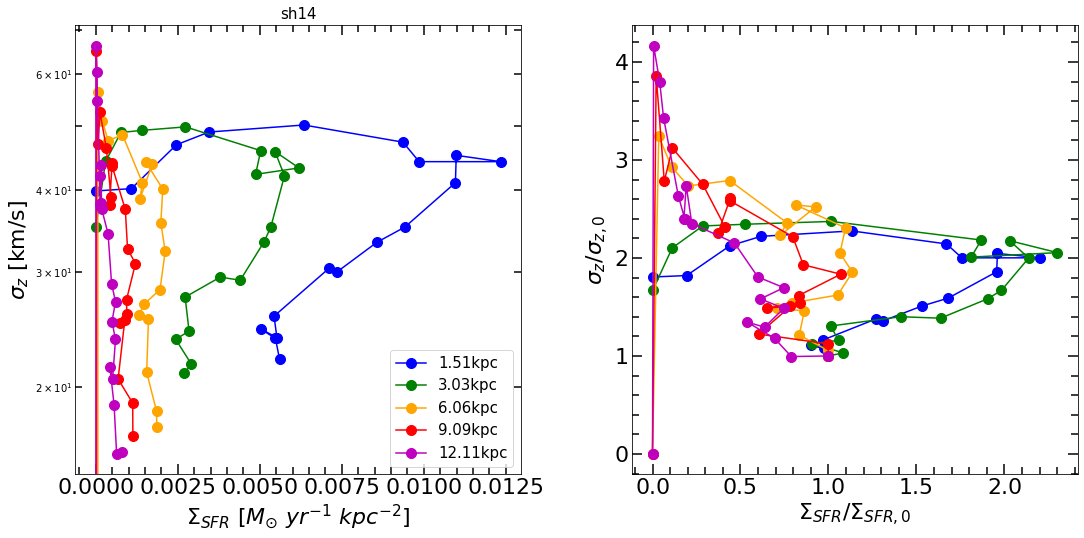

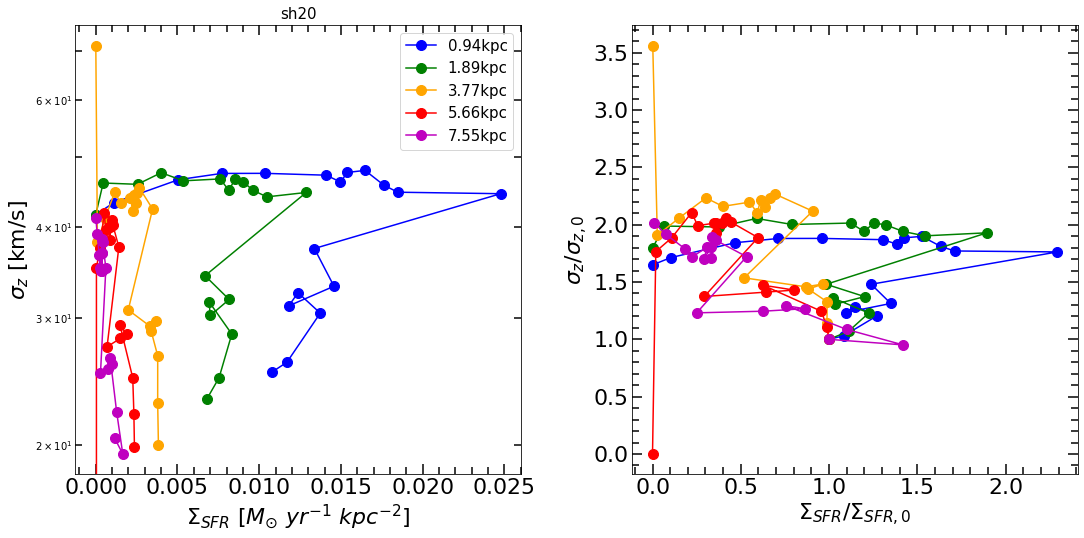

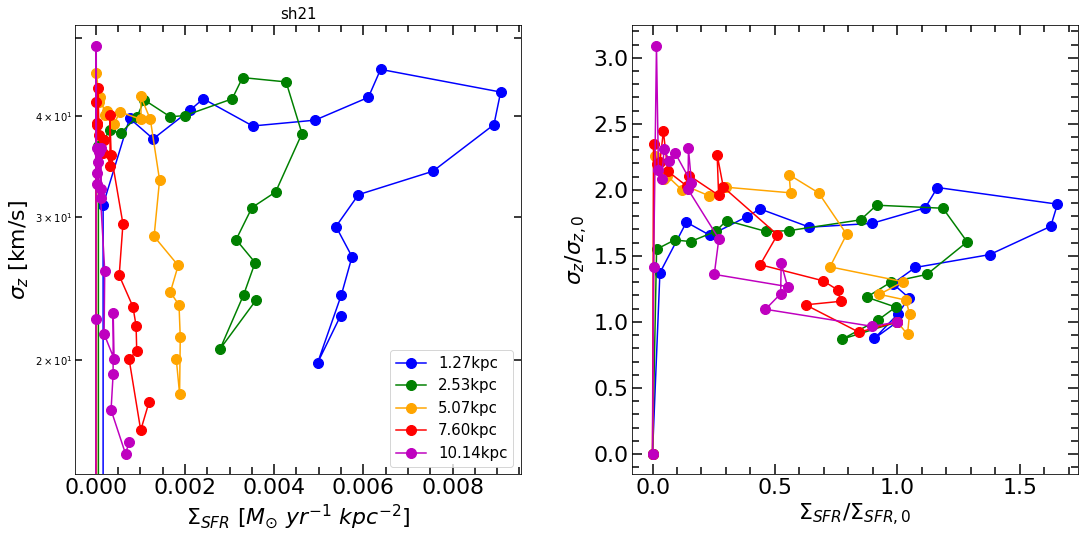

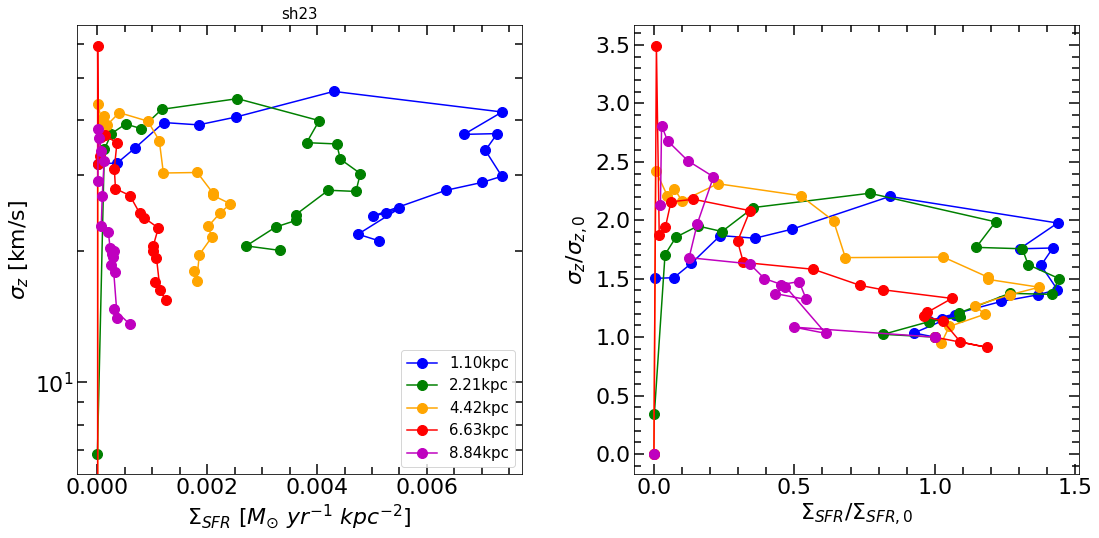

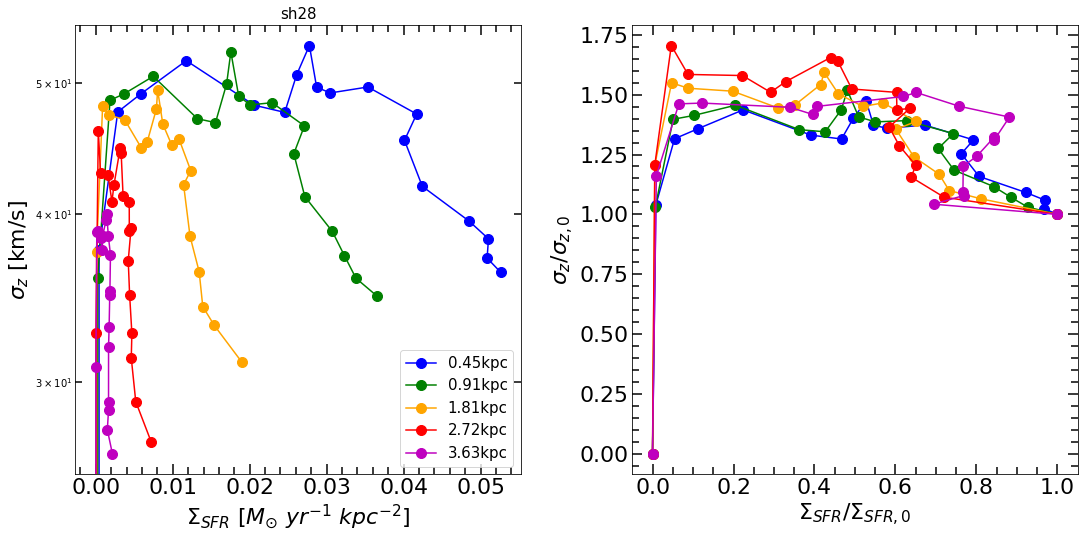

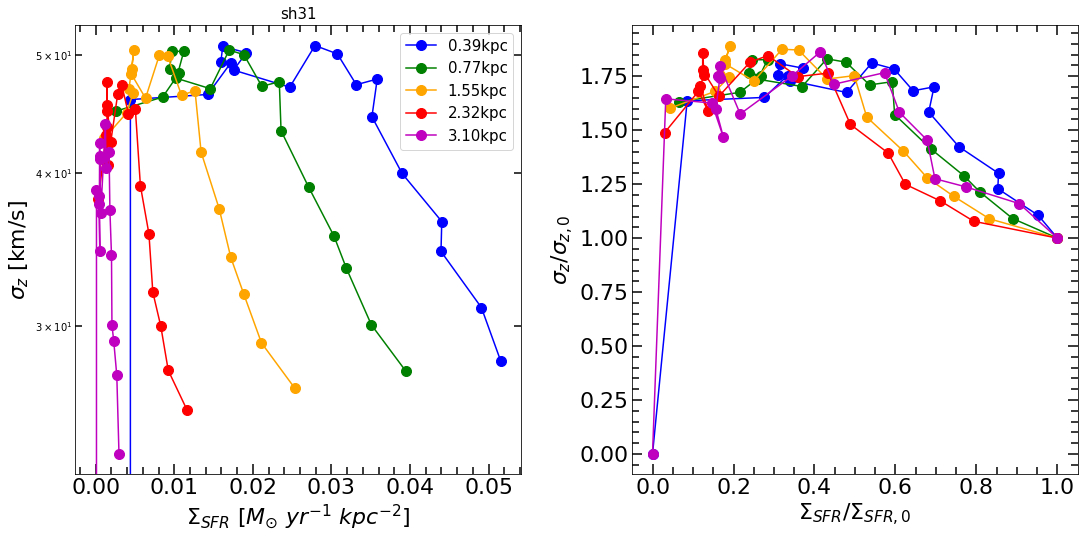

In [19]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import velocity_dispersion as vd
import matplotlib as mpl

ID = np.loadtxt('../_data/my_halos.dat')[:,0]
 
path = '/store/erebos/omarioni/_simulations/snap_127/'

colors = ('b', 'g', 'orange', 'r', 'm')

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)
    
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    Rstr = np.sqrt(xn_str**2 + yn_str**2)
 
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    fig.subplots_adjust(bottom=0.15, left =0.10, right = 0.97, top = 0.93, wspace=0.25)
    

    radius = (r50/4, r50/2, r50, r50+r50/2, r50*2)
    
    age_bin = np.linspace(0,14,20)
    
    for k in range(0,len(radius)):
        
        sigma_z = np.ones(len(age_bin))*np.nan
        z50_value = np.ones(len(age_bin))*np.nan
        
        
        gal, = np.where((Rstr < radius[k]+1) & (Rstr > radius[k]-1) & (zn_str < 5) & (zn_str > -5))


        SFR = np.ones(len(age_bin))*np.nan
        area = np.pi*2*radius[k] #esto me queda de la dif (R+1)**2-(R-1)**2
        sigma_z = np.ones(len(age_bin))*np.nan
    

        for i in range(len(age_bin)-1):
            age_lim, = np.where((age[gal]>age_bin[i]) & (age[gal]<age_bin[i+1]))
            dt = age_bin[i+1]-age_bin[i]
            Mtot = np.sum(mstr[gal][age_lim])
            SFR[i]  = Mtot/(dt*1e9)

            sigma_z[i] = vd.vel_disp(vzn[gal][age_lim])
        
        SSFR=SFR/area

        ax[0].plot(SSFR,sigma_z,'-o',ms=10,color = colors[k], label=str('%2.2f'%radius[k])+'kpc')
        ax[1].plot(SSFR/SSFR[0],sigma_z/sigma_z[0],'-o',ms=10,color = colors[k], label=str('%2.2f'%radius[k])+'kpc')

    
    ax[0].minorticks_on()
    # ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].tick_params( labelsize=22)
    ax[0].tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax[0].tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax[0].set_xlabel('$\Sigma_{SFR}$ [$M_{\odot}$ $yr^{-1}$ $kpc^{-2}$]',fontsize=22)
    ax[0].set_ylabel('$\sigma_z$ [km/s]',fontsize=22)
    ax[0].set_title('sh'+Id,fontsize=15)
    ax[0].legend(fontsize=15,fancybox=True)

    ax[1].minorticks_on()
    ax[1].tick_params( labelsize=22)
    ax[1].tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax[1].tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax[1].set_xlabel('$\Sigma_{SFR}$/$\Sigma_{SFR,0}$',fontsize=22)
    ax[1].set_ylabel('$\sigma_z$/$\sigma_{z,0}$',fontsize=22)
    
    fig.savefig('../_imagenes/SFR/SFR_sigmaz_radius_sh'+Id+'.png',dpi=100, xxbox_inches='tight')